In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./file/medical.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
...,...,...,...,...,...,...,...,...,...
110522,2.570000e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,1,No
110523,3.600000e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,1,No
110524,1.560000e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,1,No
110525,9.210000e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,1,No


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


In [5]:
print(df.isnull().any(axis=1)) # 열방향

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool


In [6]:
print(df.isnull().any(axis=0)) # 행방향

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
SMS_received      False
No-show           False
dtype: bool


In [7]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [8]:
df=df[df.Age>=0]
df.Age.min() # df['Age'].mean()

np.int64(0)

In [9]:
# 수치형 데이터
df['No-show'] = df['No-show'].map({
    'Yes' : 1,
    'No' : 0
})

df['No-show'].value_counts()

C:\Users\jangy\AppData\Local\Temp\ipykernel_13908\2487473648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No-show'] = df['No-show'].map({


No-show
0    88207
1    22319
Name: count, dtype: int64

In [10]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

C:\Users\jangy\AppData\Local\Temp\ipykernel_13908\1955808041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


C:\Users\jangy\AppData\Local\Temp\ipykernel_13908\1955808041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])


In [11]:
df['waiting_day'] = df['AppointmentDay'].dt.dayofyear - df['ScheduledDay'].dt.dayofyear # 365일 중 몇 번인지
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
 9   waiting_day     110526 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(1), int32(1), int64(4), object(2)
memory usage: 8.9+ MB


C:\Users\jangy\AppData\Local\Temp\ipykernel_13908\839910093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waiting_day'] = df['AppointmentDay'].dt.dayofyear - df['ScheduledDay'].dt.dayofyear # 365일 중 몇 번인지


In [12]:
df = df[df.waiting_day>=0]
df['waiting_day'].min()

np.int32(0)

In [13]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

<Axes: xlabel='Age'>

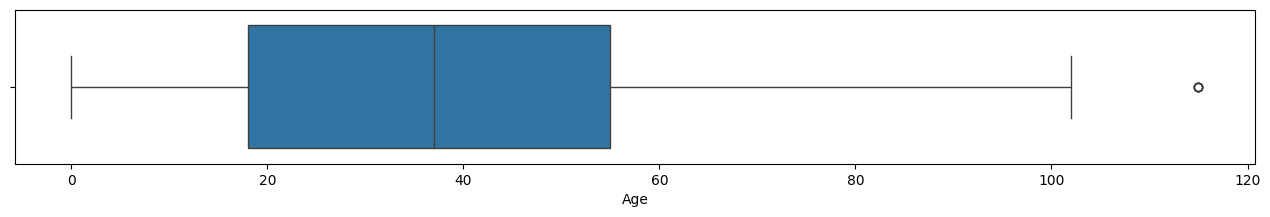

In [14]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=df.Age)

<Axes: xlabel='Age'>

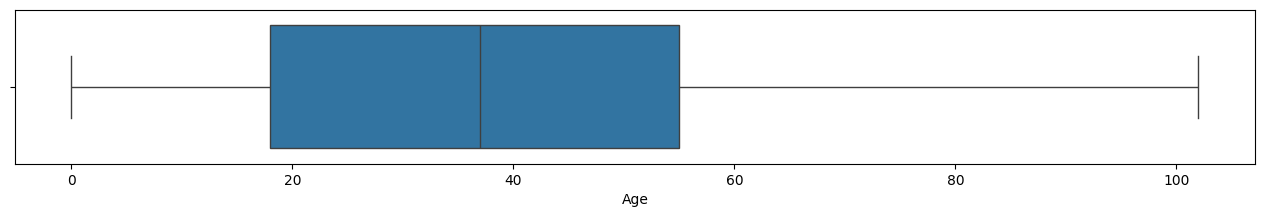

In [15]:
# 이상치 제거

df = df[df.Age<=110]
plt.figure(figsize=(16, 2))
sns.boxplot(x=df.Age)

In [16]:
a=df[df.waiting_day==0]['waiting_day'].value_counts() # 예약 당일 방문한 사람 수
b=df[(df['waiting_day']==0)&(df['No-show']==1)]['waiting_day'].value_counts() # 예약 당일 방문하지 않은 사람 수
b/a

waiting_day
0    0.046472
Name: count, dtype: float64

In [17]:
no_show = df[df['No-show']==1]
show=df[df['No-show']==0]

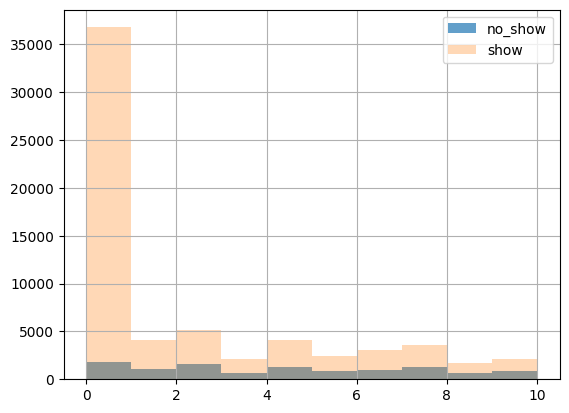

In [18]:
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7, label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3, label='show')
plt.legend()

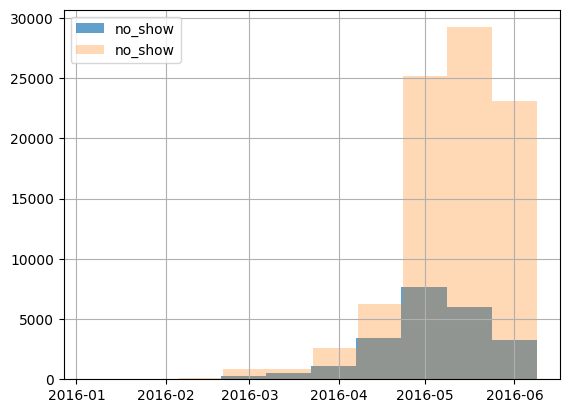

In [19]:
no_show['ScheduledDay'].hist(alpha=0.7, label='no_show')
show['ScheduledDay'].hist(alpha=0.3, label='no_show')
plt.legend()

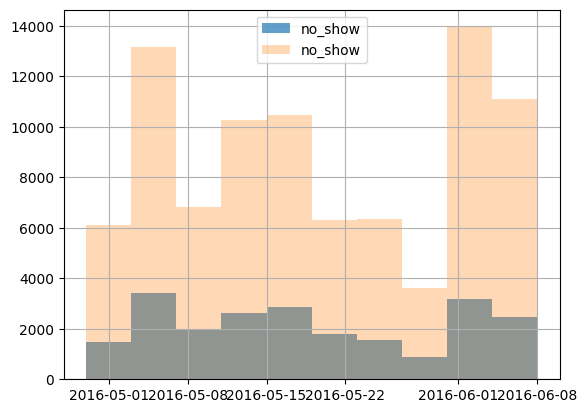

In [20]:
no_show['AppointmentDay'].hist(alpha=0.7, label='no_show')
show['AppointmentDay'].hist(alpha=0.3, label='no_show')
plt.legend()

<Axes: xlabel='SMS_received', ylabel='waiting_day'>

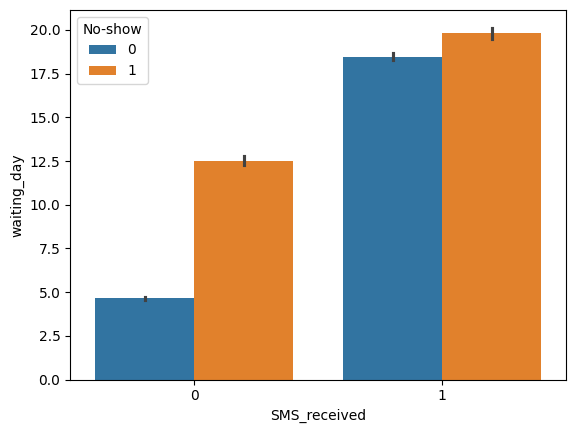

In [21]:
# 알림 메세지 허용 여부와 기다리는 기간에 따른 노쇼 발생 횟수
sns.barplot(y='waiting_day', x='SMS_received', hue='No-show', data=df)

In [23]:
a = len(df[(df['SMS_received']==0) & (df['No-show']==1)])
b = len(df[(df['SMS_received']==0) & (df['No-show']==0)])
print(f'0일 때 노쇼 : {a}')
print(f'0일 때 쇼 : {b}')
print(f'0일 때 노쇼 비율 : {a/(a+b)}')
c = len(df[(df['SMS_received']==1) & (df['No-show']==1)])
d = len(df[(df['SMS_received']==1) & (df['No-show']==0)])
print(f'1일 때 노쇼 : {c}')
print(f'1일 때 쇼 : {d}')
print(f'1일 때 노쇼 비율 : {c/(c+d)}')

0일 때 노쇼 : 12522
0일 때 쇼 : 62494
0일 때 노쇼 비율 : 0.1669243894635811
1일 때 노쇼 : 9770
1일 때 쇼 : 25668
1일 때 노쇼 비율 : 0.2756927591850556


<Axes: >

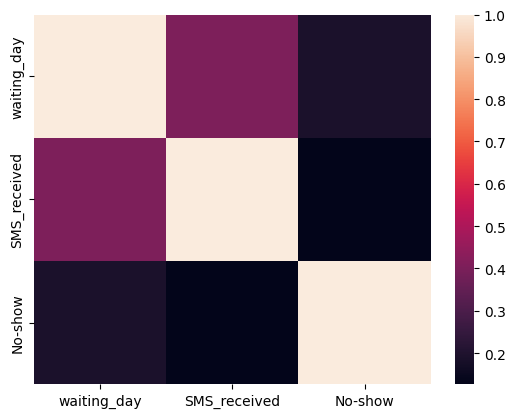

In [24]:
# 상관관계 파악
temp = df[['waiting_day', 'SMS_received', 'No-show']].corr()
sns.heatmap(temp)

<Axes: xlabel='No-show', ylabel='count'>

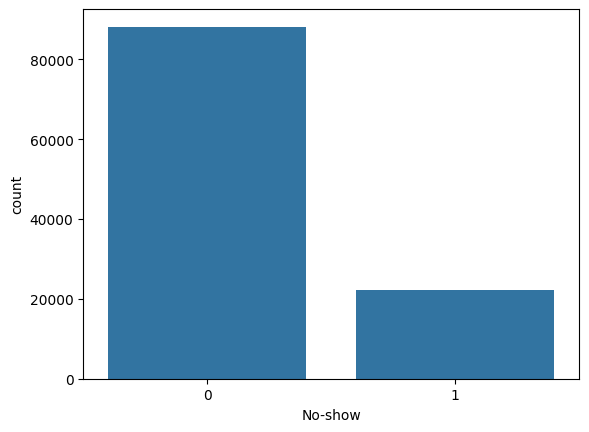

In [25]:
sns.countplot(x='No-show', data=df)

<Axes: xlabel='Gender', ylabel='count'>

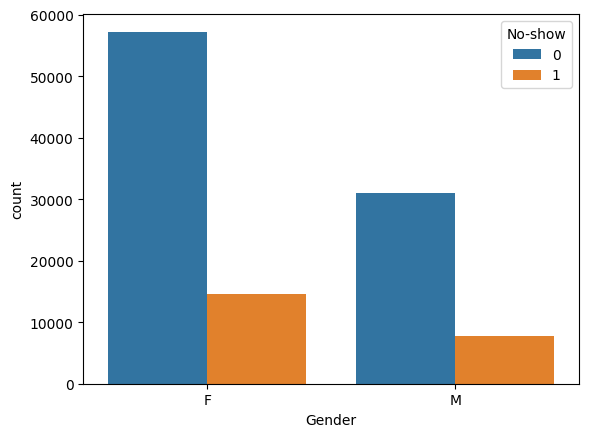

In [26]:
sns.countplot(x='Gender', hue='No-show', data=df)

In [27]:
female = df[(df['Gender'] == 'F') & (df['No-show'] == '1')]['Gender'].value_counts()
male = df[(df['Gender'] == 'M') & (df['No-show'] == '1')]['Gender'].value_counts()

female_total = df[df['Gender']=='F']['Gender'].value_counts()
male_total = df[df['Gender']=='M']['Gender'].value_counts()

print(female/female_total)
print(male/male_total)

Gender
F   NaN
Name: count, dtype: float64
Gender
M   NaN
Name: count, dtype: float64
